## Project overview

We are working with data from an e-commerce website. The site is very simple and has just 4 pages:
1. The ﬁrst page is the home page. When you come to the site for the ﬁrst time, you can only land on the home page as a ﬁrst page. 
2. From the home page, the user can perform a search and land on the search page. 
3. From the search page, if the user clicks on a product, she will get to the payment page, where she is asked to provide payment information in order to buy that product. 
4. If she does decide to buy, she ends up on the conﬁrmation page

Order of funnel: 
* user page -> home page -> search page -> payment page -> payment confirmation



Further analyse conversion at each stage of the funnel, in order to identify areas of improvements.
* A full picture of funnel conversion rate for both desktop and mobile
* Some insights on what the product team should focus on in order to improve conversion rate 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.simplefilter('ignore')

## 1. Load the data 

There are five datasets that are associated with this project. Data is for visitors to the site from 1/1/2015 - 4/30/2015.
* user_table
* home_page_table 
* search_page_table
* payment_page_table
* payment_confirmation_table

In [2]:
user=pd.read_csv('/Users/angelawu/Documents/Datasets - DS/user_table.csv')
print(user.head())

   user_id        date   device     sex
0   450007  2015-02-28  Desktop  Female
1   756838  2015-01-13  Desktop    Male
2   568983  2015-04-09  Desktop    Male
3   190794  2015-02-18  Desktop  Female
4   537909  2015-01-15  Desktop    Male


In [3]:
home_page=pd.read_csv('/Users/angelawu/Documents/Datasets - DS/home_page_table.csv')
print(home_page.head())

   user_id       page
0   313593  home_page
1   468315  home_page
2   264005  home_page
3   290784  home_page
4   639104  home_page


In [4]:
search_page=pd.read_csv('/Users/angelawu/Documents/Datasets - DS/search_page_table.csv')
print(search_page.head())

   user_id         page
0    15866  search_page
1   347058  search_page
2   577020  search_page
3   780347  search_page
4   383739  search_page


In [5]:
payment_page=pd.read_csv('/Users/angelawu/Documents/Datasets - DS/payment_page_table.csv')
print(payment_page.head())

   user_id          page
0   253019  payment_page
1   310478  payment_page
2   304081  payment_page
3   901286  payment_page
4   195052  payment_page


In [6]:
payment_confirmation=pd.read_csv('/Users/angelawu/Documents/Datasets - DS/payment_confirmation_table.csv')
print(payment_confirmation.head())

   user_id                       page
0   123100  payment_confirmation_page
1   704999  payment_confirmation_page
2   407188  payment_confirmation_page
3   538348  payment_confirmation_page
4   841681  payment_confirmation_page


## 2. Data Preprocessing

#### 2.1 For each variable: 
 
* check the missing% 

In [7]:
datasets=[user,home_page,search_page,payment_page,payment_confirmation]
print('Missing values%:','\n')
for df in datasets:
      print(df.isnull().sum()/len(df) * 100, '\n')

Missing values%: 

user_id    0.0
date       0.0
device     0.0
sex        0.0
dtype: float64 

user_id    0.0
page       0.0
dtype: float64 

user_id    0.0
page       0.0
dtype: float64 

user_id    0.0
page       0.0
dtype: float64 

user_id    0.0
page       0.0
dtype: float64 



Observations: There are no missing values for this datasets

* check the outliers

In [8]:
for df in datasets: 
    print(df.describe(),'\n')

             user_id
count   90400.000000
mean   498709.683473
std    289040.674085
min        17.000000
25%    247978.750000
50%    498267.000000
75%    749789.250000
max    999979.000000 

             user_id
count   90400.000000
mean   498709.683473
std    289040.674085
min        17.000000
25%    247978.750000
50%    498267.000000
75%    749789.250000
max    999979.000000 

             user_id
count   45200.000000
mean   498423.147655
std    288370.781395
min        17.000000
25%    248931.750000
50%    496500.500000
75%    748352.000000
max    999928.000000 

             user_id
count    6030.000000
mean   495136.066003
std    288022.646252
min        38.000000
25%    247135.500000
50%    494084.000000
75%    745352.000000
max    999896.000000 

             user_id
count     452.000000
mean   477639.798673
std    274527.225478
min      4561.000000
25%    255701.250000
50%    459776.500000
75%    712288.000000
max    999315.000000 



####  2.2 There are multiple data sources and it's better to merge them into one source table. 

In [9]:
data=pd.merge(left=user,right=home_page,how='left',on='user_id')
data=pd.merge(left=data,right=search_page,how='left',on='user_id',suffixes=('_home','_search'))
data=pd.merge(left=data,right=payment_page,how='left',on='user_id')
data=pd.merge(left=data,right=payment_confirmation,how='left',on='user_id',suffixes=('_payment','_confirmation'))
data_cr=data.copy()
# replace null value with 0 and non-null value with 1 for page_home, page_search, page_payment and page_confirmation
column_list=['page_home', 'page_search', 'page_payment', 'page_confirmation']
for column in column_list:
    data_cr[column]=data_cr[column].notnull().astype('int')    
data_cr.head()

,user_id,date,device,sex,page_home,page_search,page_payment,page_confirmation
0,450007,2015-02-28,Desktop,Female,1,0,0,0
1,756838,2015-01-13,Desktop,Male,1,0,0,0
2,568983,2015-04-09,Desktop,Male,1,1,0,0
3,190794,2015-02-18,Desktop,Female,1,1,0,0
4,537909,2015-01-15,Desktop,Male,1,0,0,0


## 3. Exploratory Analysis 

### 3.1 Basic conversion funnel 

* What’s the conversion rate of each process? 
* Through which process we lost the most customers?

In [10]:
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)


fig=go.Figure(go.Funnel(
        y=['Home gage visit','Search page visit','Payement page visit','Confirmation page visit'],
        x=data_cr.sum()[4:],
        textinfo='value+percent initial'))
fig.update_layout(
        title={'text':'Basic Conversion Funnel for Page Visits',
              'y':0.9,
              'x':0.5,
              'xanchor':'center',
              'yanchor':'top'})
fig.show()

#### 
* Only 50% of customers get to search page, 7% get to payment page from search page and only 1% of customers get to payment confirmation page. 
* We are interested in the factors that may impact the conversion rates.
* We can also create a sankey diagram to view the flow of customers in the pipeline.

### 3.2  Customer segmentation

* Based on device 
* Based on gender 
* Based on date 

Using the same method to draw the Segmented Funnel

In [11]:
def fa_plot(feature):
    fig=go.Figure()
    cr_plot=data_cr.groupby(feature).sum()[['page_home', 'page_search', 'page_payment','page_confirmation']].transpose()
    for j in cr_plot.columns:
        fig.add_trace(go.Funnel(
                name=str(j),
                y=['Home gage visit','Search page visit','Payement page visit','Confirmation page visit'],
                x=cr_plot[j],
                textinfo='value+percent initial'
                  ))
    fig.update_layout(
          title={'text':'Conversion Funnel For Different '+ feature,
          'y':0.9,
          'x':0.5,
          'xanchor':'center',
          'yanchor':'top'})
    fig.show()

    

#### 3.2.1 Impact of device / gender 

In [12]:
fa_plot('device')
fa_plot('sex')

* The overall conversion rate for mobile is higer than that for desktop for payment_page and confirmation_page conversion rate. One advice is to improve the user interface design in the desktop. 
* The largest dropoff irrcus at the home page to search page for both the mobile and desktop. The sharp drop of conversion rate on search page mainly came from the Mobile side and the decrease of conversion rate on confirmation page was mainly due to Desktop
* It seems that gender has little impact on the conversion rate. 

#### 3.2.2 Impact of date

In [13]:
# extract the month-year and week of day from data
data_cr['month_year']=pd.to_datetime(data_cr['date']).dt.to_period('M')
data_cr['week_of_day']=pd.to_datetime(data_cr['date']).dt.day_name()
fa_plot('month_year')
fa_plot('week_of_day')

### 3.3 Temporal analysis

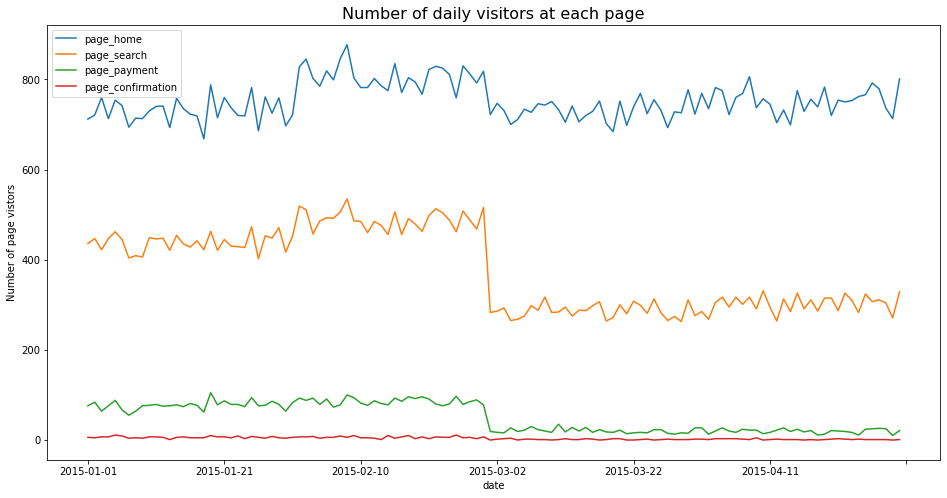

In [14]:
data_cr_date=data_cr.groupby('date')[['page_home','page_search','page_payment','page_confirmation']].sum()
data_cr_date.plot(figsize=(16,8))
plt.ylabel('Number of page vistors',fontsize=10)
plt.title('Number of daily visitors at each page',fontsize=16)
plt.show()

Text(0, 0.5, 'Number of page vistors')

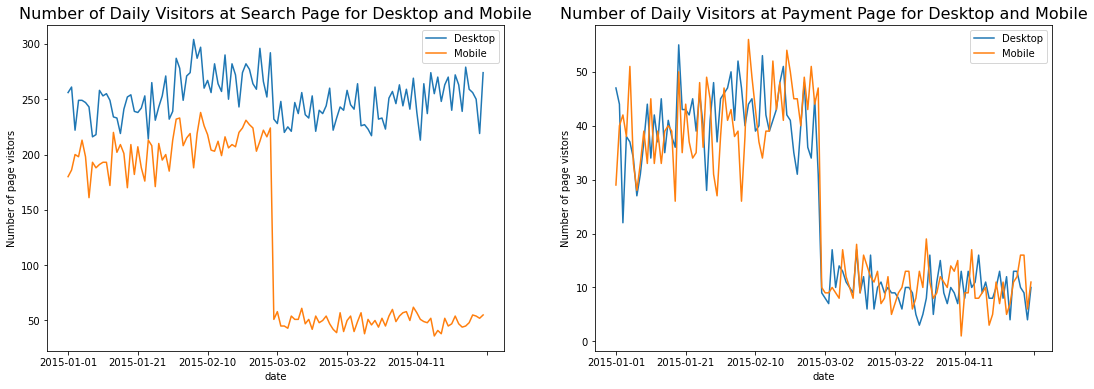

In [15]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(18,6))
data_cr_device=data_cr.groupby(['date','device']).sum()
data_cr_device=data_cr_device.reset_index().set_index('date')
data_cr_device[data_cr_device['device']=='Desktop']['page_search'].plot(label='Desktop',ax=ax[0])
data_cr_device[data_cr_device['device']=='Mobile']['page_search'].plot(label='Mobile',ax=ax[0])
ax[0].legend()
ax[0].set_title('Number of Daily Visitors at Search Page for Desktop and Mobile',fontsize=16)
ax[0].set_ylabel('Number of page vistors',fontsize=10)

data_cr_device[data_cr_device['device']=='Desktop']['page_payment'].plot(label='Desktop',ax=ax[1])
data_cr_device[data_cr_device['device']=='Mobile']['page_payment'].plot(label='Mobile',ax=ax[1])
ax[1].legend()
ax[1].set_title('Number of Daily Visitors at Payment Page for Desktop and Mobile',fontsize=16)
ax[1].set_ylabel('Number of page vistors',fontsize=10)


* There is a sharp drop in the number of mobile users landing on the search page from the home page around the beginning of March. Perhaps there was new search features that were not mobile friendly. 